# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [2]:
X.data.shape

(70000, 784)

In [3]:
y.data.shape

(70000,)

In [4]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
X.dtype

dtype('float64')

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [7]:
X[36000]


array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [8]:
y[36000]

'9'

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

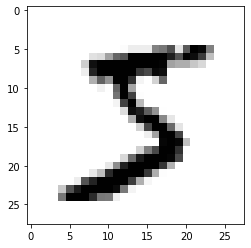

In [9]:
#interpolation = 'nearest' works well when a small image is scaled up
#interpolation = 'none' works well when a big image is scaled down


X_re = X.reshape((70000,28,28))

plt.imshow(X_re[0], cmap= plt.cm.binary, interpolation='nearest' )#I used 'greys' as a cmap, is there any difference??
plt.show()


### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

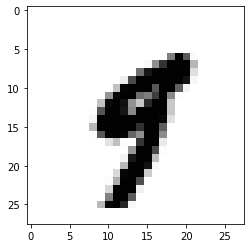

In [10]:
plt.imshow(X_re[36000], cmap= 'Greys', interpolation='nearest' )
plt.show()# yes it is the number it showed us before

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [12]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]
#Use both x and y to make the testing data, not just X

In [13]:
print(f"x_train shape:{X_train.shape}") 
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape:(60000, 784)
y_train shape: (60000,)
x_test shape: (10000, 784)
y_test shape: (10000,)


### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [1]:
#y_test = np.full(shape=60000,fill_value=5,dtype=np.int) # create a new array with only fives but It doesnt work only rises errors

#def five_fil(x):#making a filter to return only True if the number is a 5
    #if x == '5':return True #If I use any() it doesnt return anything, if I dnt use it it doesnt let me use the function bc it is ambiguous
    #else:return False
        
#for this part of the lab I asked Laura for help with this part but after trying this way I couldnt make it work
# I use broadcasting to avoid to make loops

#vector_filt = np.vectorize(five_fil)

#train_5 = vector_filt(y_train).tolist()
#test_5 = vector_filt(y_test).tolist()

#X_tr_5, y_tr_5, X_tst_5, y_tst_5 = X_train[train_5], y_train[train_5], X_test[test_5], y_test[test_5]

#print(f"x_train_5 shape:{X_tr_5.shape}") 
#print(f"y_train_5 shape: {y_tr_5.shape}")
#print(f"x_test_5 shape: {X_tst_5.shape}")
#print(f"y_test_5 shape: {y_tst_5.shape}")


#Iwas trying tha tway but I only got errors bc it was ambiguous to onlyget true, and any(), all()werent working





In [41]:

#I used instaead a raplace method and two different functions to replace the numbers 
#for just one and zeros since we only focus on 5's, but this functions didnt work neither

def changer(x):
    for x in y_train:
        if x == '5':
            x.replace(x,'1')
        else :
            x.replace(x,'0')

def changer_2(x):
    for x in y_test:
        if x == '5':
            x.replace(x, '1')
        else :
            x.replace(x,'0')

In [15]:
# I did like this without the replace just in case that was the thing is wasnt working
y_train_5 = ['1' if a == '5' else '0' for a in y_train]
y_test_5 = ['1' if a == '5' else '0' for a in y_test]

The term broadcasting describes how numpy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. There are, however, cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation.

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [17]:
from sklearn.linear_model import LogisticRegression



model = LogisticRegression(random_state = 42).fit(X_train, y_train)
model

/home/emmanuel/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=42)

In [19]:
prediction = model.predict(X_test)
prediction

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

### Does the classifier predict correctly the 36000th digit we picked before?

In [20]:
model.predict(X[35999:36001])

#It predicted that it is not a 5, it sees a 4, thats close enough to
#a 9 but not the real number that it is, so it did the job,
#but not that accurate

array(['0', '4'], dtype=object)

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [22]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [23]:
np.set_printoptions(threshold=np.inf) #to display the whole array

never_5_clf.fit(X_train, y_train_5)


In [24]:
y_never_5 = never_5_clf.predict(y_train_5)
y_never_5

#well this is giving us all false statements, so its supossed to be ok.

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [26]:
from sklearn.metrics import confusion_matrix


confusion_matrix(y_test, prediction) #This matrix it is not a confusion matrix but its the only confusion matrix im getting

array([[ 963,    0,    0,    3,    1,    3,    4,    4,    2,    0],
       [   0, 1112,    4,    2,    0,    1,    3,    2,   11,    0],
       [   3,   10,  926,   15,    6,    4,   15,    8,   42,    3],
       [   4,    1,   21,  916,    1,   26,    3,    9,   22,    7],
       [   1,    1,    7,    3,  910,    0,    9,    7,   10,   34],
       [  11,    2,    1,   33,   11,  776,   11,    6,   35,    6],
       [   9,    3,    7,    3,    7,   16,  910,    2,    1,    0],
       [   1,    6,   24,    5,    7,    1,    0,  951,    3,   30],
       [   8,    7,    6,   23,    6,   26,   10,   10,  869,    9],
       [   9,    7,    0,   11,   25,    6,    0,   22,    7,  922]])

In [58]:
confusion_matrix(y_test_5, prediction)

array([[ 998, 1147,  995,  981,  963,   83,  954, 1015,  967, 1005],
       [  11,    2,    1,   33,   11,  776,   11,    6,   35,    6],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])

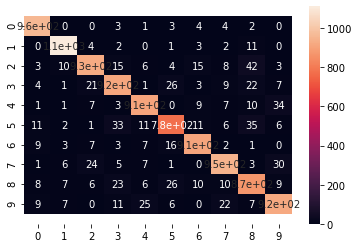

In [32]:
ax = sns.heatmap(confusion_matrix(y_test, prediction), annot=True)
b, t = ax.get_ylim()
ax.set_ylim(b + 0.5, t - 0.5)

plt.show() # I dont know what this matrix means at all

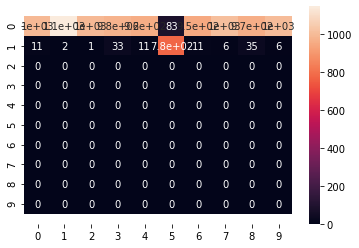

In [59]:
ax = sns.heatmap(confusion_matrix(y_test_5, prediction), annot=True)
b, t = ax.get_ylim()
ax.set_ylim(b + 0.5, t - 0.5)

plt.show()

In [42]:
confusion_matrix(y_test_5, prediction)

array([[ 998, 1147,  995,  981,  963,   83,  954, 1015,  967, 1005],
       [  11,    2,    1,   33,   11,  776,   11,    6,   35,    6],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])

In [61]:
from sklearn.metrics import precision_score

precision_score(y_test_5, prediction, average='macro')

0.09908387609857669

In [62]:
precision_score(y_test, prediction, average='macro')

0.9246626688478295

In [ ]:
#average=
#This parameter is required for multiclass/multilabel targets. 
#If None, the scores for each class are returned. 
#Otherwise, this determines the type of averaging performed on the data:

In [66]:
from sklearn.metrics import recall_score

recall_score(y_test_5, prediction, average='macro')


#Macro:
#Calculate metrics for each label, and find their unweighted mean. 
#This does not take label imbalance into account."""

0.011181615334471642

In [63]:
recall_score(y_test, prediction, average='macro')


0.9244207693413402

In [65]:
from sklearn.metrics import f1_score

f1_score(y_test_5, prediction, average='weighted')


#Weighted:
#Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). 
#This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall."""

0.17986808502209597

In [64]:
f1_score(y_test, prediction, average='weighted')


0.925382715723669

In [ ]:
#I used different averages just to see how the worked and the results they gave me

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
"""Keepig in mind that the confusion matrix that I got I think its not 
well done, looking at the F1 score, our test have a very diferent accuracies
one having good accuracy passing 92%, and the other not even close to
20%.
Our recall scores have an even bigger gap between them, one not  even in
the 1 %(this one doesnt find any positive samples), and the other at 92%(this one finds a decent 
amount of positives).
Looking at the precission score, we can see that one is really close to 0% which 
is the worst score there is, and the other is close to 1,  so the first one can call positives as
negatives way more often that the second test."""

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [79]:
from sklearn.metrics import roc_curve

roc_curve(y_test, prediction)



ValueError: multiclass format is not supported

### Now find the roc_auc_score for each. 

In [84]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, prediction, multi_class='raise')

ValueError: multi_class must be in ('ovo', 'ovr')

### What does this metric tell you? Which classifier works better with this metric in mind?